In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('tranning/diabetes.csv')  # Replace with your dataset path


In [2]:
# Data overview
print(df.head())
print(df.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

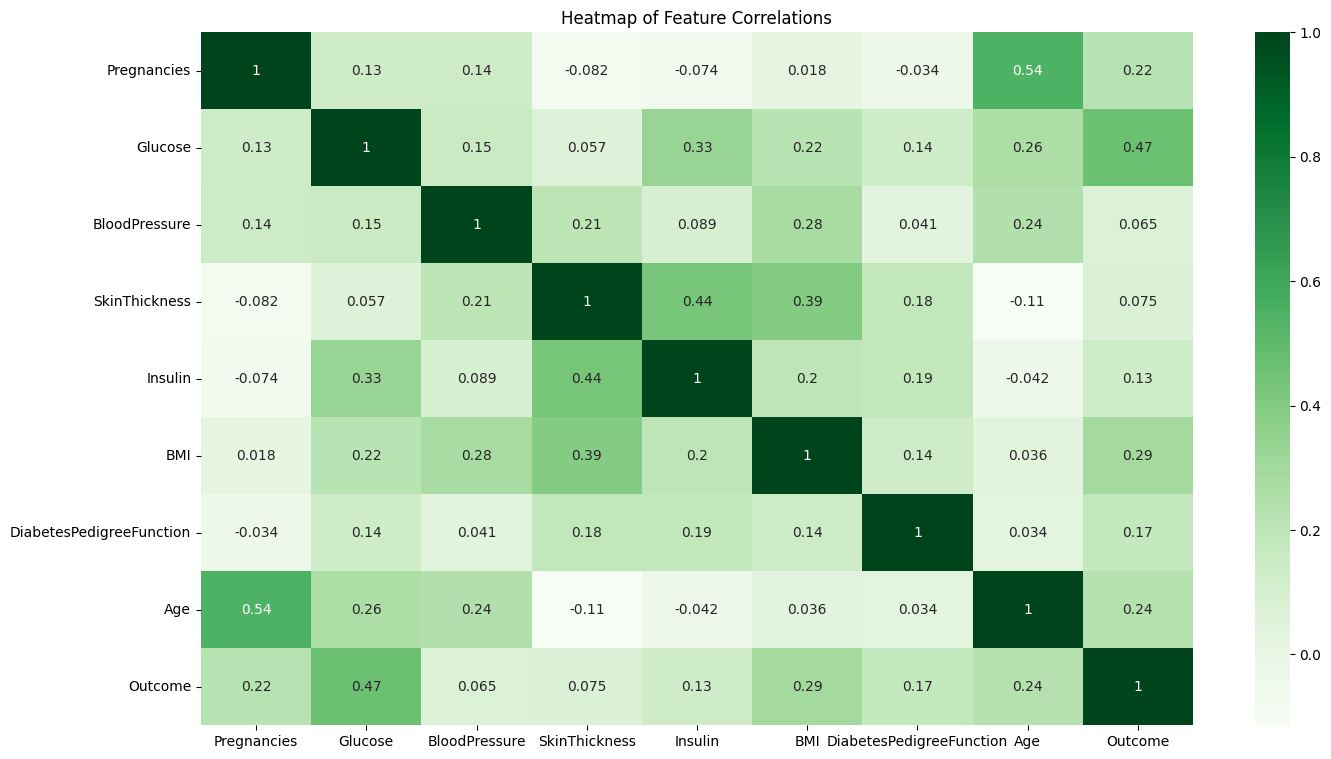

In [4]:
numeric_cols = df.select_dtypes(include=['number']).columns.to_list()
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(16, 9))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='Greens', cbar=True)
plt.title('Heatmap of Feature Correlations')
plt.show()

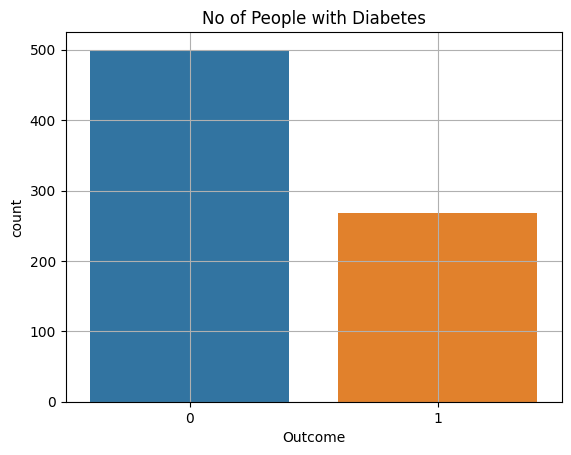

In [5]:
sns.countplot(x=df['Outcome'])
plt.title('No of People with Diabetes')
plt.grid()

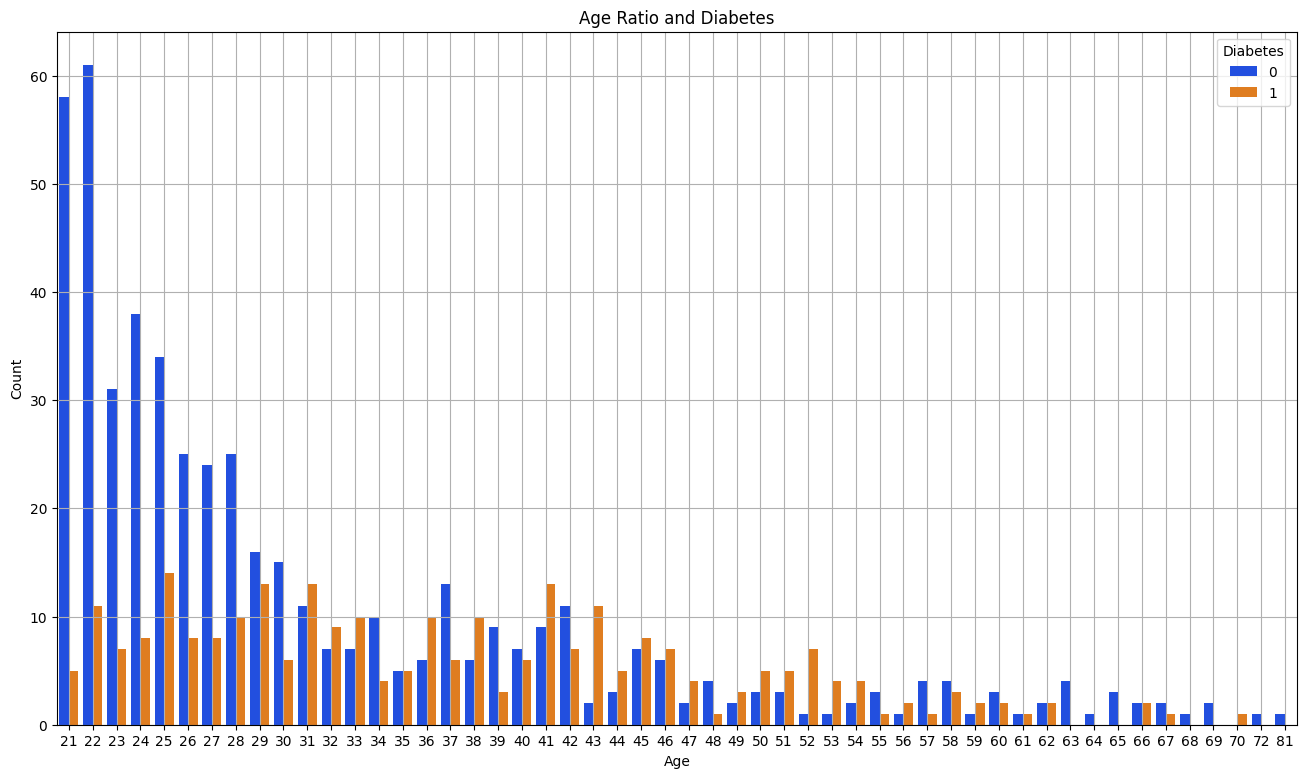

In [6]:
grouped_df = df.groupby('Outcome')['Age'].sum().reset_index()
plt.figure(figsize=(16, 9))
sns.countplot(x='Age', hue='Outcome', data=df, palette='bright')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Ratio and Diabetes')
plt.legend(title='Diabetes')
plt.grid()
plt.show()

In [7]:

# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       125
           1       0.75      0.66      0.70        67

    accuracy                           0.80       192
   macro avg       0.79      0.77      0.78       192
weighted avg       0.80      0.80      0.80       192



Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       125
           1       0.75      0.66      0.70        67

    accuracy                           0.80       192
   macro avg       0.79      0.77      0.78       192
weighted avg       0.80      0.80      0.80       192



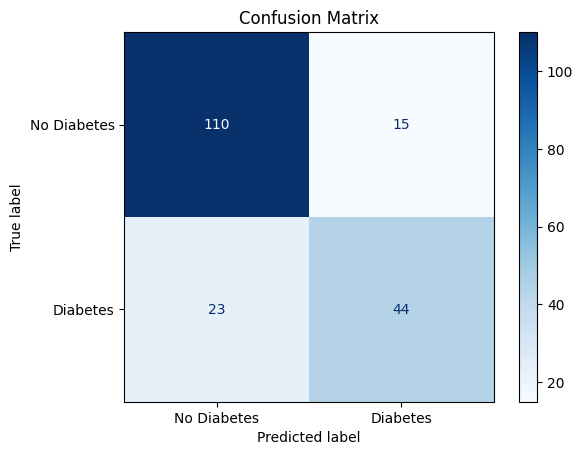

In [9]:
# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, display_labels=['No Diabetes', 'Diabetes'], cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Example real-world data (hypothetical)
real_world_data = np.array([[2, 120, 80, 35, 130, 28.5, 0.627, 45]])  

# Scale the real-world data using the fitted scaler
real_world_data = scaler.transform(real_world_data)

# Make predictions with Random Forest
prediction = rf_model.predict(real_world_data)  
print(f"RandomForest Prediction: {prediction}")
print(f"Predicted Class: {prediction[0]} (0: No Diabetes, 1: Diabetes)")

RandomForest Prediction: [1]
Predicted Class: 1 (0: No Diabetes, 1: Diabetes)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
import pickle
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("Model saved as 'rf_model.pkl'")

Model saved as 'rf_model.pkl'


In [12]:
with open('rf_scaler.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("Model saved as 'rf_scaler.pkl'")

Model saved as 'rf_scaler.pkl'
